In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import os
import shutil
from pathlib import Path
import pickle
from typing import Optional
import subprocess


from rich import print
from rich.pretty import pprint as pp

In [9]:
from src.code_gen import code_gen

DiGraph with 108 nodes and 131 edges

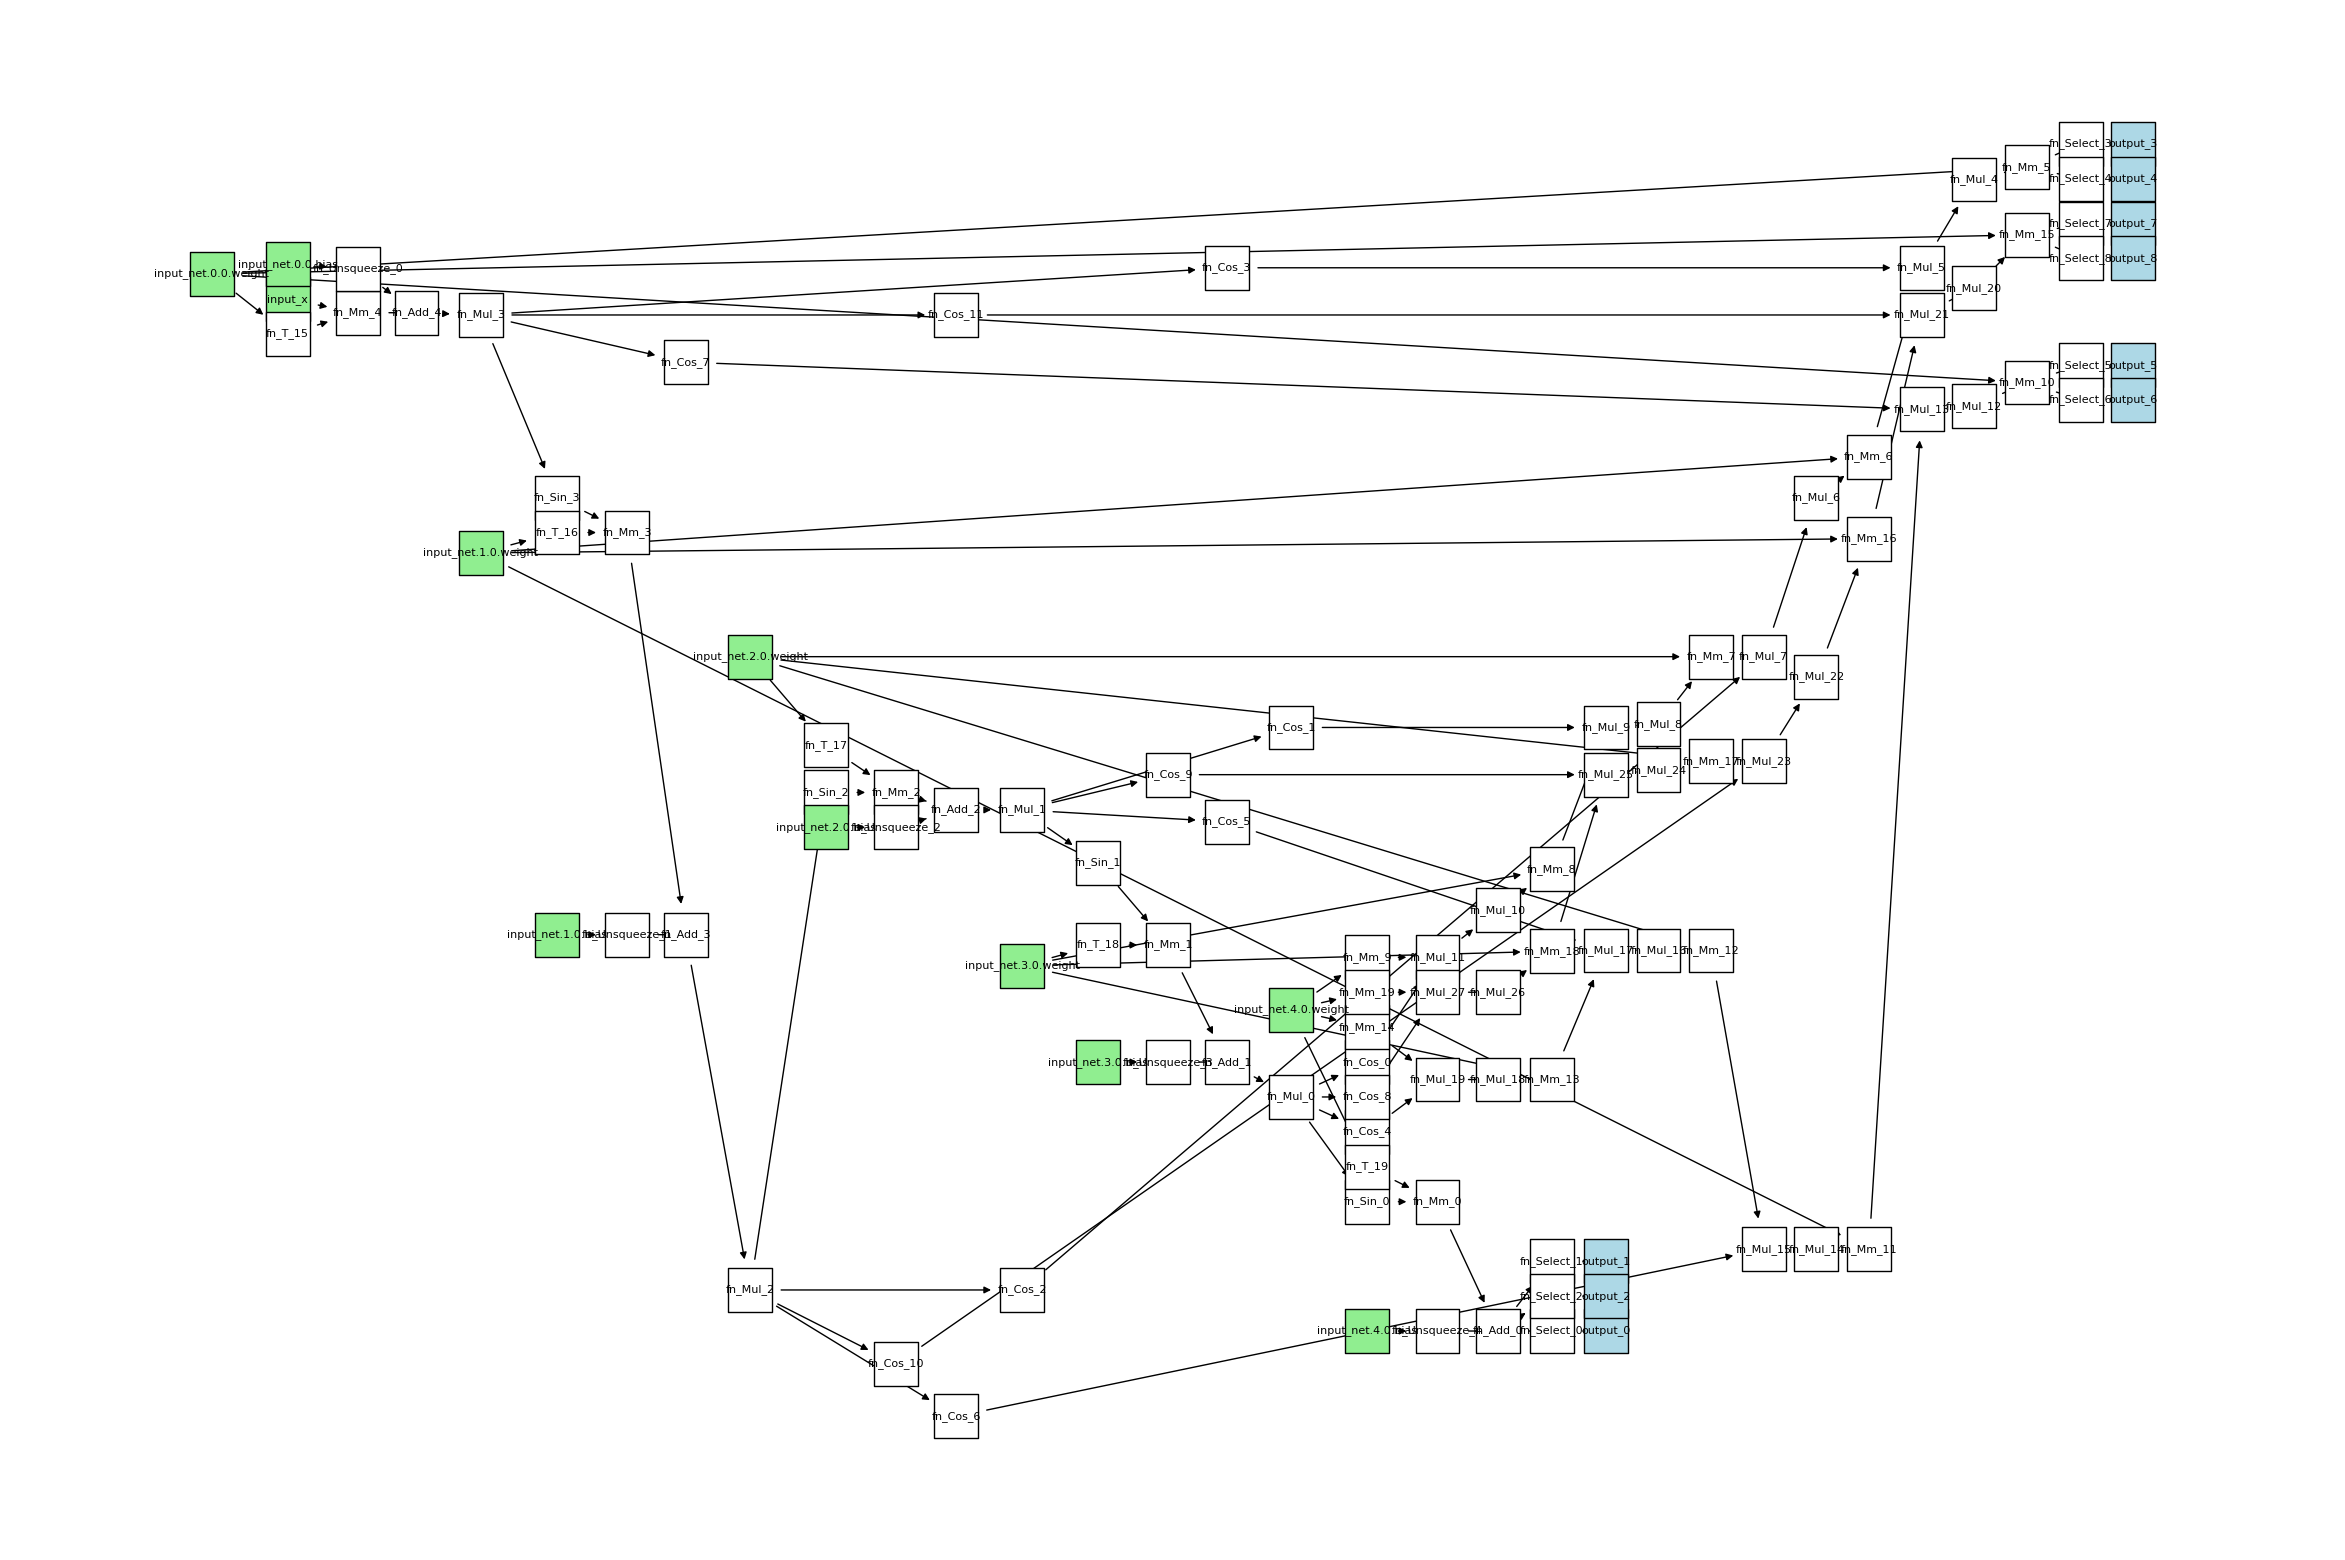

In [10]:
with open('./test_data/new_grad_lastdim_small.pkl', 'rb') as f:
    G_data = pickle.load(f)

print(G_data)


color_map = {
    "input": "lightgreen",
    "output": "lightblue",
    "fn": "white",
}

def plot_graph(G: nx.DiGraph, figure_fp: Optional[Path] = None):
    G = G.copy()
    for node in G.nodes:
        for key in ["shape"]:
            if key in G.nodes[node]:
                del G.nodes[node][key]

    fig, ax = plt.subplots(1,1, figsize=(30, 20))
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args="-Grankdir=LR -Goverlap=false -Gnodesep=1.0 -Granksep=1.0")
    colors = [color_map[G.nodes[node]["type"]] for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_shape="s", font_size=8, ax=ax, node_color=colors, edgecolors="black", node_size=1000)
    if figure_fp:
        os.makedirs(figure_fp.parent, exist_ok=True)
        plt.savefig(figure_fp, dpi=300)
    else:
        plt.show()


def write_to_dot(G: nx.DiGraph, fp: Path):
    os.makedirs(fp.parent, exist_ok=True)
    nx.nx_agraph.write_dot(G, fp)

plot_graph(G_data)
write_to_dot(G_data, Path('./test_output/graph_debug.dot'))
# print(G_data.nodes(data=True))

In [31]:
edges = list(G_data.edges(data="shape"))
edges = [(u, v, tuple(s)) for u, v, s in edges]

# group edges by shape
edge_groups = {}
for u, v, s in edges:
    if s not in edge_groups:
        edge_groups[s] = []
    edge_groups[s].append((u, v))

pp(edge_groups)

unique_shapes = list(edge_groups.keys())
pp(unique_shapes)

line_graph = nx.line_graph(G_data)
line_graph_two_hop = nx.line_graph


{
│   (4096,): [
│   │   ('fn_Select_0', 'output_0'),
│   │   ('fn_Select_1', 'output_1'),
│   │   ('fn_Select_2', 'output_2'),
│   │   ('fn_Select_3', 'output_3'),
│   │   ('fn_Select_4', 'output_4'),
│   │   ('fn_Select_5', 'output_5'),
│   │   ('fn_Select_6', 'output_6'),
│   │   ('fn_Select_7', 'output_7'),
│   │   ('fn_Select_8', 'output_8')
│   ],
│   (4096, 3): [
│   │   ('fn_Add_0', 'fn_Select_0'),
│   │   ('fn_Add_0', 'fn_Select_1'),
│   │   ('fn_Add_0', 'fn_Select_2'),
│   │   ('fn_Mm_0', 'fn_Add_0')
│   ],
│   (4096, 256): [
│   │   ('fn_Sin_0', 'fn_Mm_0'),
│   │   ('fn_Mul_0', 'fn_Sin_0'),
│   │   ('fn_Mul_0', 'fn_Cos_0'),
│   │   ('fn_Mul_0', 'fn_Cos_4'),
│   │   ('fn_Mul_0', 'fn_Cos_8'),
│   │   ('fn_Add_1', 'fn_Mul_0'),
│   │   ('fn_Mm_1', 'fn_Add_1'),
│   │   ('fn_Sin_1', 'fn_Mm_1'),
│   │   ('fn_Mul_1', 'fn_Sin_1'),
│   │   ('fn_Mul_1', 'fn_Cos_1'),
│   │   ('fn_Mul_1', 'fn_Cos_5'),
│   │   ('fn_Mul_1', 'fn_Cos_9'),
│   │   ('fn_Add_2', 'fn_Mul_1'),
│   │   ('fn_Mm_2', 'fn_Add_2'),
│   │   ('fn_Sin_2', 'fn_Mm_2'),
│   │   ('fn_Mul_2', 'fn_Sin_2'),
│   │   ('fn_Mul_2', 'fn_Cos_2'),
│   │   ('fn_Mul_2', 'fn_Cos_6'),
│   │   ('fn_Mul_2', 'fn_Cos_10'),
│   │   ('fn_Add_3', 'fn_Mul_2'),
│   │   ('fn_Mm_3', 'fn_Add_3'),
│   │   ('fn_Sin_3', 'fn_Mm_3'),
│   │   ('fn_Mul_3', 'fn_Sin_3'),
│   │   ('fn_Mul_3', 'fn_Cos_3'),
│   │   ('fn_Mul_3', 'fn_Cos_7'),
│   │   ('fn_Mul_3', 'fn_Cos_11'),
│   │   ('fn_Add_4', 'fn_Mul_3'),
│   │   ('fn_Mm_4', 'fn_Add_4'),
│   │   ('fn_Mul_4', 'fn_Mm_5'),
│   │   ('fn_Mul_5', 'fn_Mul_4'),
│   │   ('fn_Mm_6', 'fn_Mul_5'),
│   │   ('fn_Mul_6', 'fn_Mm_6'),
│   │   ('fn_Mul_7', 'fn_Mul_6'),
│   │   ('fn_Mm_7', 'fn_Mul_7'),
│   │   ('fn_Mul_8', 'fn_Mm_7'),
│   │   ('fn_Mul_9', 'fn_Mul_8'),
│   │   ('fn_Mm_8', 'fn_Mul_9'),
│   │   ('fn_Mul_10', 'fn_Mm_8'),
│   │   ('fn_Mul_11', 'fn_Mul_10'),
│   │   ('fn_Mm_9', 'fn_Mul_11'),
│   │   ('fn_Cos_0', 'fn_Mul_11'),
│   │   ('fn_Cos_1', 'fn_Mul_9'),
│   │   ('fn_Cos_2', 'fn_Mul_7'),
│   │   ('fn_Cos_3', 'fn_Mul_5'),
│   │   ('fn_Mul_12', 'fn_Mm_10'),
│   │   ('fn_Mul_13', 'fn_Mul_12'),
│   │   ('fn_Mm_11', 'fn_Mul_13'),
│   │   ('fn_Mul_14', 'fn_Mm_11'),
│   │   ('fn_Mul_15', 'fn_Mul_14'),
│   │   ('fn_Mm_12', 'fn_Mul_15'),
│   │   ('fn_Mul_16', 'fn_Mm_12'),
│   │   ('fn_Mul_17', 'fn_Mul_16'),
│   │   ('fn_Mm_13', 'fn_Mul_17'),
│   │   ('fn_Mul_18', 'fn_Mm_13'),
│   │   ('fn_Mul_19', 'fn_Mul_18'),
│   │   ('fn_Mm_14', 'fn_Mul_19'),
│   │   ('fn_Cos_4', 'fn_Mul_19'),
│   │   ('fn_Cos_5', 'fn_Mul_17'),
│   │   ('fn_Cos_6', 'fn_Mul_15'),
│   │   ('fn_Cos_7', 'fn_Mul_13'),
│   │   ('fn_Mul_20', 'fn_Mm_15'),
│   │   ('fn_Mul_21', 'fn_Mul_20'),
│   │   ('fn_Mm_16', 'fn_Mul_21'),
│   │   ('fn_Mul_22', 'fn_Mm_16'),
│   │   ('fn_Mul_23', 'fn_Mul_22'),
│   │   ('fn_Mm_17', 'fn_Mul_23'),
│   │   ('fn_Mul_24', 'fn_Mm_17'),
│   │   ('fn_Mul_25', 'fn_Mul_24'),
│   │   ('fn_Mm_18', 'fn_Mul_25'),
│   │   ('fn_Mul_26', 'fn_Mm_18'),
│   │   ('fn_Mul_27', 'fn_Mul_26'),
│   │   ('fn_Mm_19', 'fn_Mul_27'),
│   │   ('fn_Cos_8', 'fn_Mul_27'),
│   │   ('fn_Cos_9', 'fn_Mul_25'),
│   │   ('fn_Cos_10', 'fn_Mul_23'),
│   │   ('fn_Cos_11', 'fn_Mul_21')
│   ],
│   (4096, 2): [
│   │   ('input_x', 'fn_Mm_4'),
│   │   ('fn_Mm_5', 'fn_Select_3'),
│   │   ('fn_Mm_5', 'fn_Select_4'),
│   │   ('fn_Mm_10', 'fn_Select_5'),
│   │   ('fn_Mm_10', 'fn_Select_6'),
│   │   ('fn_Mm_15', 'fn_Select_7'),
│   │   ('fn_Mm_15', 'fn_Select_8')
│   ],
│   (256, 2): [
│   │   ('input_net.0.0.weight', 'fn_T_15'),
│   │   ('input_net.0.0.weight', 'fn_Mm_5'),
│   │   ('input_net.0.0.weight', 'fn_Mm_10'),
│   │   ('input_net.0.0.weight', 'fn_Mm_15')
│   ],
│   (1, 256): [
│   │   ('fn_Unsqueeze_0', 'fn_Add_4'),
│   │   ('fn_Unsqueeze_1', 'fn_Add_3'),
│   │   ('fn_Unsqueeze_2', 'fn_Add_2'),
│   │   ('fn_Unsqueeze_3', 'fn_Add_1')
│   ],
│   (256,): [
│   │   ('input_net.0.0.bias', 'fn_Unsqueeze_0'),
│   │   ('input_net.1.0.bias', 'fn_Unsqueeze_1'),
│   │   ('input_net.2.0.bias', 'fn_Unsqueeze_2'),
│   │   ('

[
│   (4096,),
│   (4096, 3),
│   (4096, 256),
│   (4096, 2),
│   (256, 2),
│   (1, 256),
│   (256,),
│   (256, 256),
│   (3, 256),
│   (1, 3),
│   (3,),
│   (2, 256),
│   (256, 3)
]